
**Comentario del Revisor**

Hola!

Soy Juan Manuel Romero, pero siéntete libre de llamarme Juanma. Soy code reviewer en Tripleten y hoy estaré revisando tu entrega.

Para simular la dinámica de un ambiente de trabajo, si veo algún error, en primer instancia solo los señalaré, dándote la oportunidad de encontrarlos y corregirlos por tu cuenta. En un trabajo real, el líder de tu equipo hará una dinámica similar. En caso de que no puedas resolver la tarea, te daré una información más precisa en la próxima revisión. 

Solo un aviso rápido: cuando estés revisando el proyecto, por favor deja mis comentarios originales tal como están. De esta manera, podemos seguir fácilmente el progreso y asegurarnos de que no se nos pase nada por alto. Y, si realizas algún cambio basado en mis comentarios, sería genial si pudieras resaltar esas actualizaciones para que se destaquen.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como estas:

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Éxito. Todo se ha hecho correctamente.

</div>


<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.

</div> 


<div class="alert alert-block alert-danger">
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Requiere corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con los comentarios en rojo.

</div>

Puedes responderme usando esto:

<div class="alert alert-block alert-info"> <b>Respuesta del estudiante.</b> <a class="tocSkip"></a> </div>

# Proyecto 10: Conservacion de los clientes de Beta Bank

# Contenido <a id='back'></a>

* [Introducción](#intro)
* [Objetivo](#objetivo)
* [Análisis exploratorio](#analisis_expl)
* [Importación de librerías](#imp_lib)
* [Importación de datasets](#imp_data)
* [Análisis de Data](#analisis_dt)
    * [Análisis de columna con valores ausentes: Tenure](#analisis_tenure)
* [Valores duplicados de Data](#duplicated)
* [Características](#caract_gen)
* [División de datos](#div_gen)
* [Desbalance de clases ](#desclass_gen)
* [Modelo: Regresión Logística](#reg_log)
    * [Ajuste de clase con Upsampling ](#upsamp_reg_log)
        * [Función para ajuste de clase con Upsampling](#f_upsamp_reg_log)
        * [F1 con datos estandarizados para Upsampling](#data_upsamp_reg_log)
        * [ F1 sin datos estandarizados para Upsampling](#without_standard_reg_log)
    * [Ajuste de clase con Downsampling ](#downsamp_reg_log)
        * [Función para ajuste de clase con Downsampling](#f_downsamp_reg_log)
        * [F1 con datos estandarizados para Downsampling](#downsamp_standard_reg_log)
        * [F1 sin datos estandarizados para Downsampling](#downsamp_without_standard_reg_log)
    * [Métricas y Curva ROC  del modelo de Regresión Logística](#etrics_curve_reg_log)
        * [Ajuste de umbral](#umbral__curve_reg_log)
        * [Métricas](#metrics_reg_log)
        * [Curva ROC](#metrics__curve_reg_log)
* [Modelo: Random Forest Classifier](#random_for)
    * [Entrenamiento del modelo para Upsampling](#training_random_for_up)
        * [F1 para Upsampling](#f1_up_random_for)
    * [Métricas y Curva ROC  del modelo Random Forest](#metrics_curve_reg_log)
        * [Ajuste de umbral ](#umbral__curve_random_for)
        * [Métricas](#metrics_random_forest)
        * [Curva ROC](#metrics_random_forest)
    * [Entrenamiento del modelo para Downsampling](#training_random_for_down)
        * [F1 para Downsampling ](#f1_down_random_for)
* [Conclusión](#conclusion)


# Introducción <a id='intro'></a>

Los clientes de Beta Bank se están yendo, cada mes, poco a poco. Los banqueros descubrieron que es más barato salvar a los clientes existentes que atraer nuevos.

# Objetivo <a id='objetivo'></a>

El objetivo de este análisis es determinar en base a los datos históricos de nuestros clientes si estos mismos dejarán de tener su cuenta en Beta Bank en un futuro.

# Análisis exploratorio <a id='analisis_expl'></a>

En el siguiente apartado se observarán a detalle los datos con los que se está trabajando. Bajo las siguiente situaciones se realizarán cambios:

-Datos nulos

-Filas repetidas.

-Datos que impidan realizar el análisis por el formato en el que vienen.

## Importación de librerías<a id='imp_lib'></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, recall_score, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt

## Importación de datasets<a id='imp_data'></a>

In [2]:
data = pd.read_csv("/datasets/Churn.csv")

## Análisis de Data <a id='analisis_dt'></a>

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


<span style='color:green'> Considero que el tipo de datos es correcto y se podría trabajar bien a excepcion de la columna 'Tenure' la cual nos podría indicar con el análisis posterior y en combinacion con toda la demás info que tan leales son los clientes. Al mismo tiempo, tiene valores ausentes que vamos analizar ya que sí tiene valores '0' los cuales indicarían que tiene menos del año, pero los 909 valores ausentes considero deberían rellenarse ya que vamos a probar un modelo lineal y tendría problemas si no se hiciera este paso. </span>

### Análisis de columna con valores ausentes: Tenure <a id='analisis_tenure'></a>

<function matplotlib.pyplot.show(close=None, block=None)>

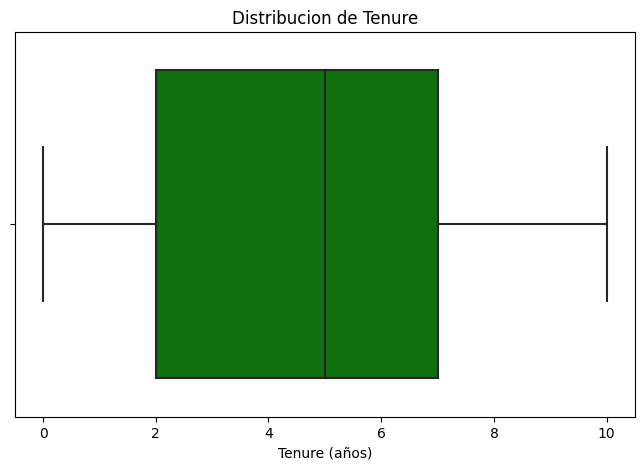

In [6]:
plt.figure(figsize=(8,5))
sns.boxplot (x = data ['Tenure'], color = 'green')
plt.title('Distribucion de Tenure')
plt.xlabel('Tenure (años)')

plt.show

<span style='color:green'> Tenure cuenta con una distribución uniforme en sus datos y no tiene outliers, así que rellenaré con la mediana que tenemos en 'data.describe()' ya que no sesga los datos y ya contamos con el dato. </span>

In [7]:
data['Tenure_New'] = data['Tenure'].fillna(5)
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Tenure_New
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1,2.0
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0,1.0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1,8.0
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0,1.0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0,2.0


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Buen trabajo eliminando los datos faltantes en la columna Tenure! El manejo adecuado de los valores ausentes es crucial para evitar problemas en el entrenamiento del modelo.

</div>

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
 14  Tenure_New       10000 non-null  float64
dtypes: float64(4), int64(8), object(3)
memory usage: 1.1+ MB


<span style='color:green'> Añadí una nueva columna para hacer las modificaciones y de ser necesario más adelante, cambiarlo. En este caso el boxplot mostró ser uniforme y al no tener outliers se podrían ocupar la media o mediana, siento esta ultima la que utilicé para probar nuestro primer modelo que será el lineal y necesitará la informacion completa. De esta forma ya podemos continuar con el análisis </span>

## Valores duplicados de Data <a id='duplicated'></a>

In [9]:
data.duplicated().sum()

0

<span style='color:green'> Se observa que no hay valores duplicados y se puede continuar.  </span>

[Volver a Contenidos](#back)

## Características  <a id='caract_gen'></a>

In [10]:
df_log = data.drop(columns = 'Tenure')
cols = ['Geography', 'Gender']
df_log_dummies = pd.get_dummies(df_log, columns = cols, drop_first = True)

x = df_log_dummies.drop(columns=['Exited', 'RowNumber', 'CustomerId', 'Surname'])  
y = df_log_dummies['Exited']  

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Excelente trabajo utilizando One-Hot Encoding (OHE)! Esta técnica es ideal para convertir variables categóricas en un formato numérico, permitiendo que los modelos de aprendizaje automático puedan procesarlas. OHE asegura que los datos categóricos no introduzcan relaciones ficticias entre variables.

Además, usaste correctamente `drop_first=True`, lo que evita la multicolinealidad al eliminar una categoría redundante. Esto ayuda a reducir la dimensionalidad de los datos sin perder información.


</div>

<span style='color:green'> Se omite 'Tenure' y se deja la nueva columna Tenure_New que ya tiene sus datos completos para que la prueba en modelos pueda ser lo más uniforme posible. Se aplica primero One Hot Encoder para las variables categóricas. También se eliminan todas esas columnas del análisis ya que no representarían algún dato importante para cualquier modelo que se utilice  </span>

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Parece que no eliminaste las columnas irrelevantes. Aunque es opcional, es recomendable eliminar columnas como RowNumber, CustomerId y Surname, ya que no añaden valor predictivo. Considera limpiar esos datos para mejorar el rendimiento del modelo.

</div>

## División de datos  <a id='div_gen'></a>

In [11]:
#25% de los datos se destinan a validacion y 75% para el entrenamiento del modelo
features_train, features_valid, target_train, target_valid = train_test_split(x, y , test_size= 0.25, random_state = 12345)

## Desbalance de clases  <a id='desclass_gen'></a>

In [12]:
target_train.value_counts()

0    5998
1    1502
Name: Exited, dtype: int64

<span style='color:green'> Con este conteo sobre nuestro objetivo podemos observar un desbalance de clases. Entre la clase 1 que significa que se ha ido el cliente y 0 que aún no. Esto podría ser de manera muy generalizada un buen dato pero se necesita balancear para que el modelo trabaje de manera adecuada. </span>

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Excelente! Has estudiado el balance de clases. Este es un paso crucial cuando las clases están desbalanceadas, ya que puede afectar el rendimiento del modelo. Al comprender la distribución de las clases, puedes aplicar técnicas para corregir el desequilibrio.

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Siempre ten en cuenta que mostrar algunos datos importantes con gráficos es más apropiado. 

</div>
    
</div>

## Modelo: Regresión Logística<a id='reg_log'></a>

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Excelente presentación del trabajo. Las secciones son super claras.

</div>

### Ajuste de clase con Upsampling <a id='upsamp_reg_log'></a>

#### Función para ajuste de clase con Upsampling <a id='f_upsamp_reg_log'></a>

In [13]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled

#### F1 con datos estandarizados para Upsampling <a id='data_upsamp_reg_log'></a>

In [14]:
features_upsampled, target_upsampled = upsample(
    features_train, target_train, 10)

scaler = StandardScaler()

features_upsampled_sc = scaler.fit_transform(features_upsampled)
features_valid_sc = scaler.transform(features_valid)


model_log_up = LogisticRegression(class_weight='balanced', random_state = 12345, solver='liblinear')
model_log_up.fit (features_upsampled_sc, target_upsampled)
predicted_valid= model_log_up.predict(features_valid_sc)

print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.5050234427327529


<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Veo que utilizas un x10 para la clase minoritaria. Esto no te generaría un nuevo (y peor) desbalance en los datos?
    
TIP: Te aconsejo que luego de aplicar remuestreo, veas que los totales por cada clase son los que esperas.

</div>

<span style='color:green'> Antes de entrenar al modelo se estandarizan los datos para obtener un mejor F1 y también se pone un argumento para balancear las clases. El resultado se acerca nuestro objetivo en F1. </span>

#### F1 sin datos estandarizados para Upsampling<a id='without_standard_reg_log'></a>

In [15]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 10)

model_log_without_up = LogisticRegression(class_weight='balanced', random_state=12345, solver='liblinear')
model_log_without_up.fit(features_upsampled, target_upsampled)
predicted_valid =model_log_without_up.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid))


F1: 0.4513329200247985


<span style='color:green'> En ambos se aplicó el upsampling y definitivamente tuvo un mejor rendimiento el modelo con la estandarización de los datos aunque no hay tanta diferencia. Probaremos con downsampling para ver sí es mejor con el balanceo de clases. </span>

[Volver a Contenidos](#back)

### Ajuste de clase con Downsampling <a id='downsamp_reg_log'></a>

#### Función para ajuste de clase con Downsampling <a id='f_downsamp_reg_log'></a>

In [16]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat( [target_zeros.sample(frac = fraction, random_state = 12345)] + [target_ones] )

    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state = 12345)


    return features_downsampled, target_downsampled

#### F1 con datos estandarizados para Downsampling <a id='downsamp_standard_reg_log'></a>

In [17]:
features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.1
)

scaler = StandardScaler()

features_downsampled_sc = scaler.fit_transform(features_downsampled)
features_valid_scaled = scaler.transform(features_valid)



model_down = LogisticRegression(class_weight='balanced', random_state = 12345, solver='liblinear')
model_down.fit (features_downsampled_sc, target_downsampled)
predicted_valid_down= model_down.predict(features_valid_scaled)

print('F1:', f1_score(target_valid, predicted_valid_down))

F1: 0.5102990033222591


<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Similar al comentario anterior. Luego de aplicar downsampling con 0.1, obtienes los porcentajes que esperas por clase?

</div>

#### F1 sin datos estandarizados para Downsampling <a id='downsamp_without_standard_reg_log'></a>

In [18]:
features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.1
)



model_log_down = LogisticRegression(class_weight='balanced', random_state = 12345, solver='liblinear')
model_log_down.fit (features_downsampled, target_downsampled)
predicted_valid_down= model_log_down.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid_down))


F1: 0.5022364217252395


<span style='color:green'> Pasó una situación parecida en cuanto a usar los datos estandarizados o no, pero en este caso usando downsampling y los datos estandarizados es la mejor opción y esta sería la mejor opcion en cuanto al balance de las clases. </span>

[Volver a Contenidos](#back)

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Muy bien! Usaste al menos dos técnicas para tratar el desbalanceo de clases, como el ajuste de pesos, upsampling o downsampling. Estas técnicas son fundamentales para que el modelo no favorezca la clase mayoritaria y tenga un mejor rendimiento en la clase minoritaria.

</div>

### Métricas y Curva ROC  del modelo de Regresión Logística<a id='metrics_curve_reg_log'></a>

<span style='color:green'> Para analizar nuestro modelo se pueden probar diferentes umbrales. Al mismo tiempo, se trabaja con el modelo con datos estandarizados y downsampling</span>

#### Ajuste de umbral <a id='umbral__curve_reg_log'></a>

In [19]:
proba_predictions = model_down.predict_proba(features_valid_scaled)[:, 1] 


threshold = 0.5 
predictions_adjusted = (proba_predictions > threshold).astype(int)


#### Métricas <a id='metrics_reg_log'></a>

In [20]:
f1 = f1_score(target_valid, predictions_adjusted)
roc_auc = roc_auc_score(target_valid, proba_predictions)
conf_matrix = confusion_matrix(target_valid, predictions_adjusted)

print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Matriz de Confusión:\n", conf_matrix)

F1 Score: 0.5102990033222591
ROC AUC Score: 0.7647998858528929
Matriz de Confusión:
 [[1379  586]
 [ 151  384]]


<span style='color:green'> Al mover el umbral no es posible con este modelo hacer un incremento del F1 puesto que a pesar de que ROC - AUC se mantiene durante estos cambios, el F1 solo baja, el mejor ajuste de umbral sigue siendo 0.5</span>

#### Curva ROC <a id='metrics__curve_reg_log'></a>

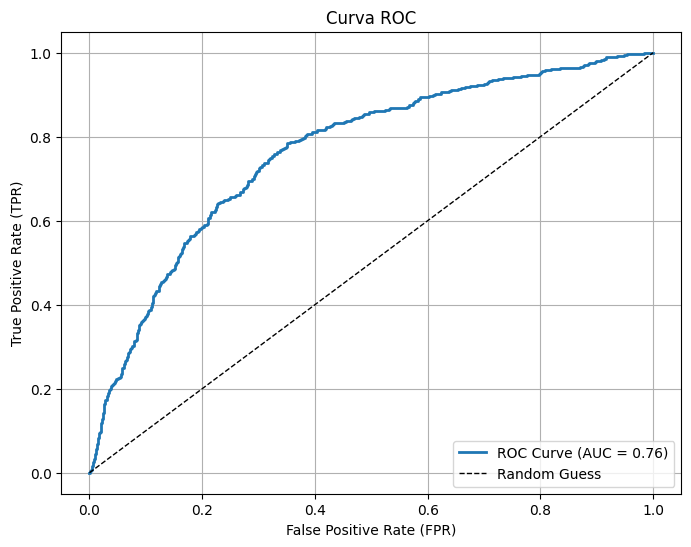

In [21]:
fpr, tpr, thresholds = roc_curve(target_valid, proba_predictions)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess", linewidth=1)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

<span style='color:green'> Finalmente lo mejor que se pudo lograr pero sin llegar al objetivo fue un F1 de 0.51, lo que indicaría que le hace flata para ser considerado optimo y tiene problemas para detectar correctamente a los clientes que no abandonan el banco. En cuanto al ROC - AUC se desempeña mejor ya que ni moviendo el umbral tiene tanta variación, así que tiene un nivel decente detectanto entre clases. Y finalmente con la matriz de confusión tenemos 586 clientes que no abandonan pero em modelo dijo que sí, y a su vez 151 donde predijo que sí abandona cuando no es así, esto esta relacionado al balance de clases. Todo esto indicaría que se podría mejor estas métricas con un modelo más robusto como el Random Forest </span>

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Excelente! Estudiaste la métrica AUC-ROC, que es una de las mejores métricas para evaluar modelos de clasificación binaria. Un buen AUC-ROC indica que el modelo es capaz de distinguir correctamente entre las clases.

</div>

[Volver a Contenidos](#back)

## Modelo: Random Forest Classifier<a id='random_for'></a>

### Entrenamiento del modelo para Upsampling <a id='training_random_for_up'></a>

In [22]:
model_rf_up = RandomForestClassifier (
    n_estimators= 200,
    max_depth = 10,
    random_state = 12345,
    class_weight = 'balanced'

)

#### F1 para Upsampling <a id='f1_up_random_for'></a>

In [23]:
model_rf_up.fit(features_upsampled_sc, target_upsampled)
predicted_valid_up = model_rf_up.predict(features_valid_sc )
print('F1 de Random Forest Upsampled:', f1_score(target_valid, predicted_valid_up))

F1 de Random Forest Upsampled: 0.6428571428571429


<span style='color:green'> Como ya contabamos con los datos estandarizados, decidi usar esos datos. La cantidad de arboles apra este bosque lo determiné cambiando el número y el mejor fue 200, así como la profundidad esta fue la mejor combinación. También para obtener los mejores resultados decidí poner el argumento para balancear las clases. Este modelo con Upsamplig fue el mejor y superó el objetivo de 0.59 de F1.</span>

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Genial! Has alcanzado una métrica F1 superior al 0.59. Esta métrica es muy útil en situaciones con clases desbalanceadas, ya que considera tanto la precisión como la exhaustividad (recall) del modelo.

Excelente trabajo!

</div>

[Volver a Contenidos](#back)

### Métricas y Curva ROC  del modelo Random Forest<a id='metrics_curve_reg_log'></a>

#### Ajuste de umbral <a id='umbral__curve_random_for'></a>

In [24]:
proba_predictions_rf_up = model_rf_up.predict_proba(features_valid_sc)[:, 1] 

threshold_rf_up = 0.5
predictions_adjusted_rf_up = (proba_predictions_rf_up > threshold_rf_up).astype(int)

<span style='color:green'> Al igual que en upsampling pero con el modelo lineal, traté de ajustar el umbral pero 0.4 o 0.6 no daban mejores resultados así que 0.5 fue lo mejor. </span>

#### Métricas <a id='metrics_random_forest'></a>

In [25]:
f1_rf_up = f1_score(target_valid, predictions_adjusted_rf_up)
roc_auc_rf_up = roc_auc_score(target_valid, proba_predictions_rf_up)
conf_matrix_rf_up = confusion_matrix(target_valid, predictions_adjusted_rf_up)


print("F1 Score:", f1_rf_up)
print("ROC AUC Score:",roc_auc_rf_up)
print("Matriz de Confusión:\n", conf_matrix_rf_up)

F1 Score: 0.6428571428571429
ROC AUC Score: 0.8638738674466717
Matriz de Confusión:
 [[1683  282]
 [ 148  387]]


<span style='color:green'> Aquí los falsos positivos disminuyeron así como los falsos negativos, dato que es importante y sugiere un modelo más óptimo para decidir si el cliente se va o no </span>

#### Curva ROC <a id='metrics_random_forest'></a>

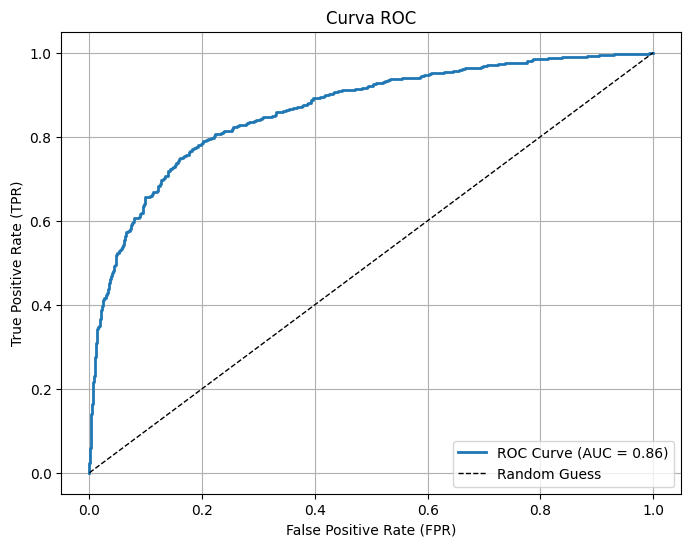

In [26]:
fpr_rf_up, tpr_rf_up, thresholds_rf_up = roc_curve(target_valid, proba_predictions_rf_up)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_up, tpr_rf_up, label=f'ROC Curve (AUC = {roc_auc_rf_up:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess", linewidth=1)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

<span style='color:green'>  El modelo random forest por ser un modelo más robusto lo demuestra con la mejoría del modelo, y que tiene altas probabilidades de decidir si se quedan o no con ese ROC AUC Score de 0.86 </span>

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Excelente!

</div>

[Volver a Contenidos](#back)

### Entrenamiento del modelo para Downsampling <a id='training_random_for_down'></a>

In [27]:
model_rf_down = RandomForestClassifier (
    n_estimators= 100,
    max_depth = 10,
    random_state = 12345,
    class_weight = 'balanced'

)

#### F1 para Downsampling <a id='f1_down_random_for'></a>

In [28]:
model_rf_down.fit(features_downsampled_sc, target_downsampled)
predicted_valid_down = model_rf_down.predict(features_valid_scaled )
print('F1 de Random Forest Upsampled:', f1_score(target_valid, predicted_valid_down))

F1 de Random Forest Upsampled: 0.5433391506689936


<span style='color:green'>  Desde este paso decido no continuar con el Downsampling ya que elimina datos de la clase mayoritaria, lo cual podría limitar el modelo al no aprovechar toda la información disponible. Y al mismo tiempo porque se obtienen valores parecidos con el modelo lineal y este al ser un bosque, desde este pasó debería de verse la mejoría en cuanto a resultados, cosa que no se logró. </span>

# Conclusión <a id='conclusion'></a>

<span style='color:green'>  El modelo Random Forest con upsampling ofrece el mejor balance entre precisión y sensibilidad. Puede identificar clientes propensos a abandonar con un F1 Score de 0.64 y un excelente AUC de 0.86, lo cual lo hace ideal para implementar estrategias de retención proactivas.
El mejor modelo con ajuste del desbalance de clases es el Random Forest con Upsampling ya que ofrece y supera las expectaticas del objetivo de F1 de 0.59 con F1 de 0.64. Esto nos quiere decir que sí puede identificar clientes que tiendan a abandonar Beta Bank. De acuerdo a todo el análisis no son tantos casos pero por decir un ejemplo, se podrían negociar el con el departamento de ventas y ofrecer descuentos para que obtengan más productos a lo largo del tiempo esto se traduce en fidelidad a nuestro banco y por lo tanto menos abandono </span>

[Volver a Contenidos](#back)


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Felicidades Aylin! Tu trabajo es excelente.

Tu entrega es correcta, super organizada y tus comentarios y conclusiones muy acertadas. 

Has completado todos los items necesarios para aprobar la entrega.

</div>